In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


In [2]:
# 필요한 패키지 import 하기
import os 
import matplotlib.pyplot as plt
import numpy as np

# [기본 이미지]

### 1. 이미지 불러오기

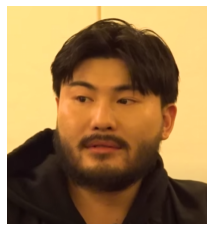

In [3]:
img_bgr = cv2.imread('images/카더가든_정면_진지.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(77, 118) (262, 304)]]


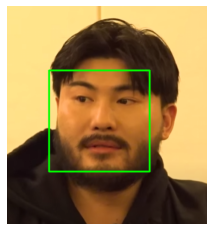

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 3. 랜드마크 검출

In [7]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [8]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


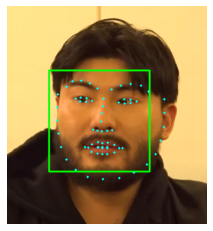

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [10]:
print(list_landmarks)

[[(93, 162), (92, 186), (92, 210), (94, 234), (99, 259), (109, 282), (126, 301), (148, 314), (176, 318), (206, 316), (233, 306), (257, 291), (273, 272), (282, 247), (288, 222), (289, 196), (289, 171), (109, 148), (120, 138), (136, 137), (152, 142), (166, 151), (192, 153), (209, 146), (227, 143), (246, 146), (260, 157), (177, 170), (176, 184), (174, 197), (173, 212), (158, 227), (166, 229), (174, 230), (184, 229), (193, 228), (126, 170), (135, 168), (146, 169), (156, 174), (145, 176), (134, 175), (205, 177), (215, 171), (227, 172), (238, 175), (227, 178), (216, 179), (143, 259), (156, 254), (167, 250), (175, 252), (185, 251), (197, 255), (212, 261), (197, 269), (184, 272), (175, 272), (166, 271), (155, 268), (149, 260), (167, 259), (175, 259), (184, 259), (206, 261), (184, 261), (175, 261), (167, 260)]]


In [11]:
print(dlib_rects)

rectangles[[(77, 118) (262, 304)]]


### 4. 스티커 적용하기

In [12]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(173, 212)
(x,y) : (173,310)
(w,h) : (186,187)


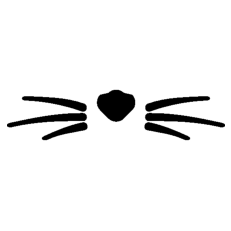

In [14]:
sticker_path = 'images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [15]:
img_sticker.shape

(512, 512, 3)

In [16]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(187, 186, 3)


In [17]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (80,123)


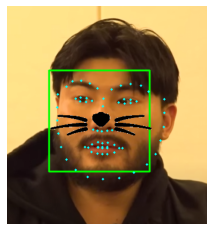

In [18]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()

### 5. 최종 결과 출력

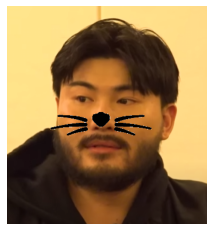

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

### 회고 !!
아무리 np.where의 img_sticker의 수치를 조정해도 수염의 배경이 사라지지 않아 절망했는데   
처음 이미지 부터 다시 imshow를 실행해야 한다는 점을 알게 되었습니다.   
막힐 때는 처음부터 찬찬히 생각하는 습관을 키워야겠다는 생각이 들었습니다.   

# [다른 각도 이미지-우측면]

### 1. 이미지 불러오기

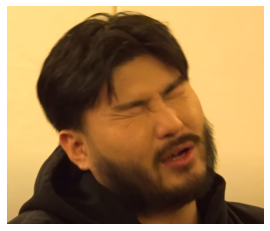

In [20]:
img_bgr = cv2.imread('images/카더가든_우측면_찡긋.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

###  2. 얼굴 검출

rectangles[[(221, 139) (407, 325)]]


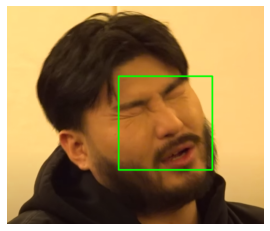

In [21]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 3. 랜드마크 검출

In [22]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [23]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


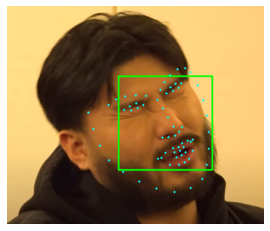

In [24]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [25]:
print(dlib_rects)

rectangles[[(221, 139) (407, 325)]]


### 문제점 !!

이번 킨더가든의 얼굴은 우리가 봤을 때 왼쪽으로 살짝 기울어져 있습니다.   
따라서 수염 스티커도 그에 맞게 회전을 적용시켜주어야 합니다.   

### 4. 스티커 적용 - 얼굴이 돌아가 있으므로 회전 적용

In [26]:
import math
import cv2

def get_face_angle(landmark):
    """
    양쪽 눈(36, 45번 랜드마크)을 사용해 얼굴 각도를 추정.
    landmark: 68개 랜드마크 배열
    return: 얼굴 기울기(도 단위, float)
    """
    (x1, y1) = landmark[36]  # 왼쪽 눈 끝
    (x2, y2) = landmark[45]  # 오른쪽 눈 끝

    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = angle_radians * 180.0 / math.pi
    return angle_degrees


def rotate_image(img, angle, center=None, scale=1.0):
    """
    img    : 회전시킬 이미지(numpy 배열)
    angle  : 회전 각도(도 단위) - 양수면 반시계
    center : 회전 기준점(기본값: 이미지 중앙)
    scale  : 회전 배율
    """
    (h, w) = img.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(
        img,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 흰색으로 채움
    )
    return rotated


In [27]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(330, 239)
(x,y) : (330,337)
(w,h) : (187,187)


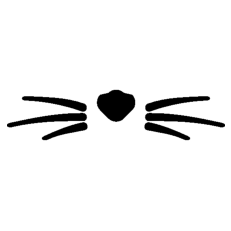

In [28]:
sticker_path = 'images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [29]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(187, 187, 3)


In [30]:
# 각도 계산 + 회전
angle_degrees = get_face_angle(landmark)  # 위에서 정의한 함수 사용
angle_degrees = -angle_degrees
img_sticker = rotate_image(img_sticker, angle_degrees)

In [31]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (237,150)


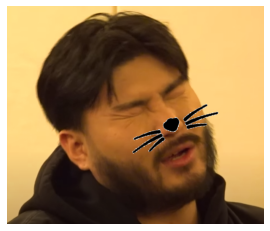

In [32]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

## [다른 각도 이미지-좌측면]

### 1. 이미지 불러오기

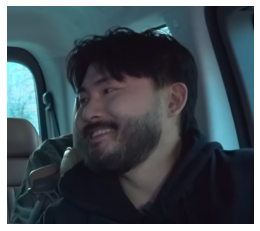

In [33]:
img_bgr = cv2.imread('images/카더가든_좌측면.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

rectangles[]


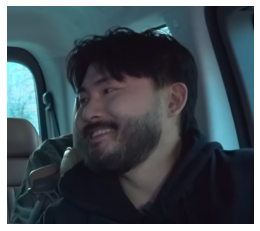

In [34]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 문제점 !!
이번 칼든강도의 얼굴은 너무 많이 회전되어서 그런지 바운딩 박스 검출이 되지 않았습니다.   
HOG 업샘플링 횟수를 증가시켜 더 세밀한 검출을 시도해보겠습니다.  

rectangles[[(79, 101) (272, 294)]]


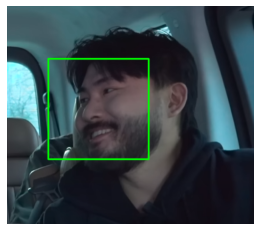

In [35]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 문제 해결 !!
1에서 2로만 키워줬는데 해결되었습니다.   
성공 !

### 3. 랜드마크 검출

In [36]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [37]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


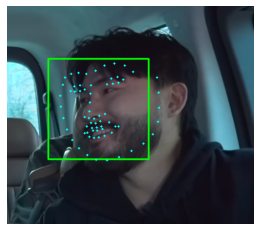

In [38]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [39]:
print(dlib_rects)

rectangles[[(79, 101) (272, 294)]]


### 4. 스티커 적용

In [40]:
import math
import cv2

def get_face_angle(landmark):
    """
    양쪽 눈(36, 45번 랜드마크)을 사용해 얼굴 각도를 추정.
    landmark: 68개 랜드마크 배열
    return: 얼굴 기울기(도 단위, float)
    """
    (x1, y1) = landmark[36]  # 왼쪽 눈 끝
    (x2, y2) = landmark[45]  # 오른쪽 눈 끝

    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = angle_radians * 180.0 / math.pi
    return angle_degrees


def rotate_image(img, angle, center=None, scale=1.0):
    """
    img    : 회전시킬 이미지(numpy 배열)
    angle  : 회전 각도(도 단위) - 양수면 반시계
    center : 회전 기준점(기본값: 이미지 중앙)
    scale  : 회전 배율
    """
    (h, w) = img.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(
        img,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 흰색으로 채움
    )
    return rotated


In [41]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(158, 202)
(x,y) : (158,304)
(w,h) : (194,194)


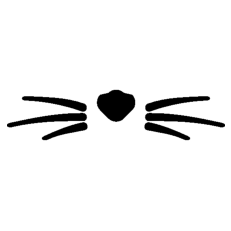

In [42]:
sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [43]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(194, 194, 3)


In [44]:
# 각도 계산 + 회전
angle_degrees = get_face_angle(landmark)  # 위에서 정의한 함수 사용
angle_degrees = -angle_degrees
img_sticker = rotate_image(img_sticker, angle_degrees)

In [45]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (61,110)


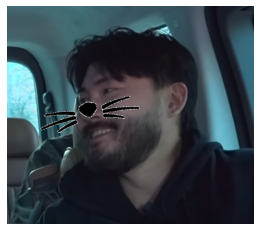

In [46]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

## [다소 멀리서 촬영한 이미지]

### 1. 이미지 불러오기

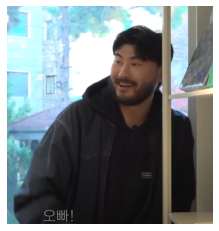

In [32]:
img_bgr = cv2.imread('images/카더가든_멀리서_오빠.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

rectangles[[(205, 96) (295, 186)]]


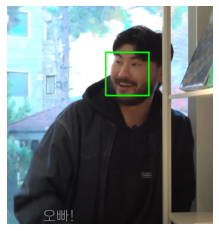

In [33]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 3. 랜드마크 검출

In [34]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [35]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


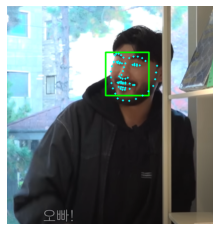

In [36]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [37]:
print(dlib_rects)

rectangles[[(205, 96) (295, 186)]]


### 4. 스티커 적용

In [38]:
import math
import cv2

def get_face_angle(landmark):
    """
    양쪽 눈(36, 45번 랜드마크)을 사용해 얼굴 각도를 추정.
    landmark: 68개 랜드마크 배열
    return: 얼굴 기울기(도 단위, float)
    """
    (x1, y1) = landmark[36]  # 왼쪽 눈 끝
    (x2, y2) = landmark[45]  # 오른쪽 눈 끝

    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = angle_radians * 180.0 / math.pi
    return angle_degrees


def rotate_image(img, angle, center=None, scale=1.0):
    """
    img    : 회전시킬 이미지(numpy 배열)
    angle  : 회전 각도(도 단위) - 양수면 반시계
    center : 회전 기준점(기본값: 이미지 중앙)
    scale  : 회전 배율
    """
    (h, w) = img.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(
        img,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 흰색으로 채움
    )
    return rotated


In [39]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(238, 143)
(x,y) : (238,193)
(w,h) : (91,91)


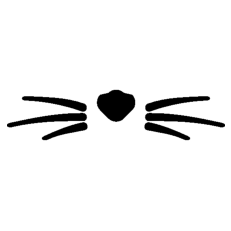

In [40]:
sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [41]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(91, 91, 3)


In [42]:
# 각도 계산 + 회전
angle_degrees = get_face_angle(landmark)  # 위에서 정의한 함수 사용
angle_degrees = -angle_degrees
img_sticker = rotate_image(img_sticker, angle_degrees)

In [43]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (193,102)


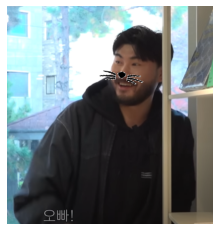

In [44]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

### 회고!!
다소 멀리서 찍은 사진도 잘 적용이 됩니다.   
다른 실험을 더 해보겠습니다.   

## [다소 멀리서 포즈와 함께 촬영한 이미지]

### 1. 이미지 불러오기

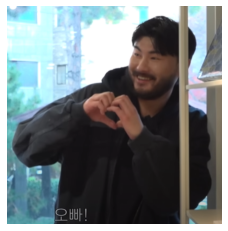

In [49]:
img_bgr = cv2.imread('images/카더가든_멀리서_오빠하트.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 6)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 문제점 !!
차정원님이 하트 포즈를 취하니 얼굴 검출이 안 됩니다.   
피라미드 수를 아무리 높여봐도 어렵네요.   
6 부터는 커널이 죽어버려 더 이상 높일 수도 없습니다.   
딥러닝 기반 모델을 사용해야 할 것 같습니다.   
우선 다른 이미지 실험을 먼저 해보겠습니다.   


## [다소 멀리서 음식을 들고 촬영한 이미지]

### 1. 이미지 불러오기

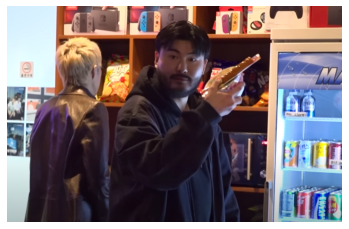

In [3]:
img_bgr = cv2.imread('images/카더가든_멀리서_음식들고.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

rectangles[[(325, 86) (414, 176)]]


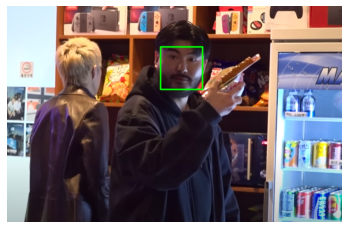

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 3. 랜드마크 검출

In [5]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [6]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


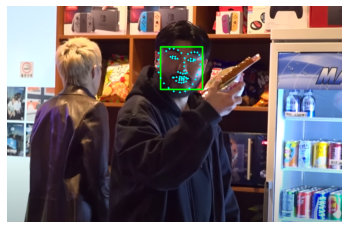

In [7]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [8]:
print(dlib_rects)

rectangles[[(325, 86) (414, 176)]]


### 4. 스티커 적용

In [9]:
import math
import cv2

def get_face_angle(landmark):
    """
    양쪽 눈(36, 45번 랜드마크)을 사용해 얼굴 각도를 추정.
    landmark: 68개 랜드마크 배열
    return: 얼굴 기울기(도 단위, float)
    """
    (x1, y1) = landmark[36]  # 왼쪽 눈 끝
    (x2, y2) = landmark[45]  # 오른쪽 눈 끝

    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = angle_radians * 180.0 / math.pi
    return angle_degrees


def rotate_image(img, angle, center=None, scale=1.0):
    """
    img    : 회전시킬 이미지(numpy 배열)
    angle  : 회전 각도(도 단위) - 양수면 반시계
    center : 회전 기준점(기본값: 이미지 중앙)
    scale  : 회전 배율
    """
    (h, w) = img.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(
        img,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 흰색으로 채움
    )
    return rotated


In [10]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(375, 136)
(x,y) : (375,186)
(w,h) : (90,91)


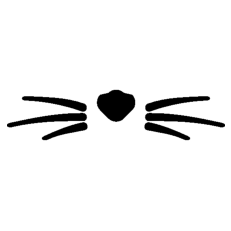

In [11]:
sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [12]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(91, 90, 3)


In [13]:
# 각도 계산 + 회전
angle_degrees = get_face_angle(landmark)  # 위에서 정의한 함수 사용
angle_degrees = -angle_degrees
img_sticker = rotate_image(img_sticker, angle_degrees)

In [14]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (330,95)


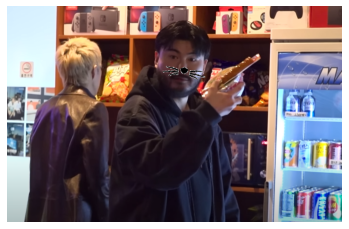

In [15]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

### 회고 !!
정면 이미지라서 그런지는 몰라도 음식을 들고 있는 이미지도 잘 되는 것을 확인했습니다.   
아무래도 하트 손모양은 둥근 부분이 있어 얼굴과 비슷한 부분이 많아 검출이 어렵나봅니다.   

## [추가 실험 - 안경쓴 행복한 자이언티]

### 1. 이미지 불러오기

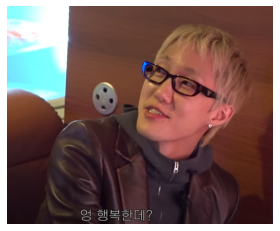

In [16]:
img_bgr = cv2.imread('images/자이언티_안경_행복한.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 2. 얼굴 검출

rectangles[[(262, 118) (448, 304)]]


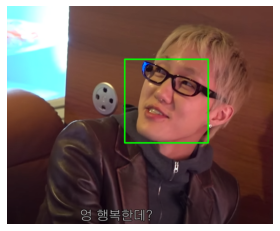

In [17]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.axis('off')
plt.show()

### 3. 랜드마크 검출

In [18]:
# landmark 모델 불러오기

model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [19]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


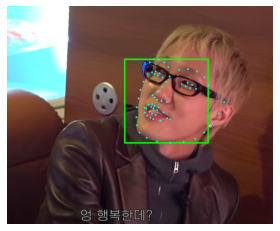

In [20]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.axis('off')
plt.show()
    # 이미지를 출력

In [21]:
print(dlib_rects)

rectangles[[(262, 118) (448, 304)]]


### 4. 스티커 적용

In [22]:
import math
import cv2

def get_face_angle(landmark):
    """
    양쪽 눈(36, 45번 랜드마크)을 사용해 얼굴 각도를 추정.
    landmark: 68개 랜드마크 배열
    return: 얼굴 기울기(도 단위, float)
    """
    (x1, y1) = landmark[36]  # 왼쪽 눈 끝
    (x2, y2) = landmark[45]  # 오른쪽 눈 끝

    angle_radians = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = angle_radians * 180.0 / math.pi
    return angle_degrees


def rotate_image(img, angle, center=None, scale=1.0):
    """
    img    : 회전시킬 이미지(numpy 배열)
    angle  : 회전 각도(도 단위) - 양수면 반시계
    center : 회전 기준점(기본값: 이미지 중앙)
    scale  : 회전 배율
    """
    (h, w) = img.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(
        img,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 흰색으로 채움
    )
    return rotated


In [23]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 + 5
    w = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (262-77+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    h = dlib_rect.height() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(335, 190)
(x,y) : (335,288)
(w,h) : (187,187)


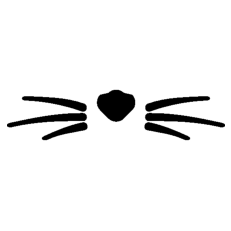

In [24]:
sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

plt.imshow(img_sticker)
plt.axis('off')
plt.show()

In [25]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(187, 187, 3)


In [26]:
# 각도 계산 + 회전
angle_degrees = get_face_angle(landmark)  # 위에서 정의한 함수 사용
angle_degrees = -angle_degrees
img_sticker = rotate_image(img_sticker, angle_degrees)

In [27]:
# 스티커 시작점 위치 확인 (스티커 좌상단의 위치 확인) -> 음수면 이미지 범위 벗어난 것

refined_x = x - w // 2
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (242,101)


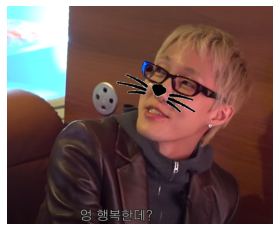

In [28]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

### 회고 !!
안경 쓴 자이언티도 랜드마크가 잘 검출이 되는 것을 확인했습니다.   
하트 포즈는 조금 더 고민을 해봐야겠습니다.   